# Take Home Project

- Steven L. Byrd
- 43 Harrington st.
- San Francisco, CA 94112
- (303)-475-3770
- byrdsl@gmail.com
- http://www.linkedin.com/in/stevenlbyrd
- http://www.github.com/byrdsl1999

# Outline

- [A brief summary of findings(TL/DR)](#tldr)
- [Questions being considered](#questions)
- [In Depth Summary](#summary)
- [Importing](#importing)
- [Initial Data Review](#review)
- High Level Review
    - [Customers](#customers)
    - [Jumpers](#jumpers)
    - [Partners](#partners)
- Trends
    - [Spatial Patterns(Maps)](#spatial)
    - [Temporal Patterns](#temporal)
        - [Order Time](#order_time)
- [Data Integrity](#integrity)



<a id='tldr'></a>
## TL/DR

There appears to be a vibrant market in Manhattan. We have >3000 users, >550 jumpers, almost 900 partners.

Several growth opportunities exist. We recommend that we: 
- Expand into burroughs other than Manhattan(See [maps](#spatial)), 
- Trying to increase sales to repeat customers, 
- Focus on weekend sales(especially Saturday), 
- sales of meals other than dinner.

There are a couple of data integrity issues:
- Some timestamps are missing.
- There are some duplicate entries that suggest we may need to consider database adjustments.


<a id='questions'></a>
## Questions being considered

- The CEO of Jumpman23 has just asked you ​how are things going in New York​?
    - Are there opportunities for growth?
    - Can/How can we reach 20% growth in a 2 month time frame?
    - How could new resources best be allocated?
    - Are there any geospatial patterns? Can these be expressed with a graph?
    
- Are there any data integrity(quality) issues in the data from NYC?
    - What are they?
    - How might they be addressed?
    - Do they impact the above analysis?
    


<a id='summary'></a>
#### Summary

- Data Overview
    - How many customers?
        - Total unique customers: 3192
        - Customers making 1 order: 1939
        - Customers making 5 or more orders: 196
        - **Large number of single order users suggests opportunity to growth in repeat orders.**
    - How many jumpers, and what transportation do they use?
        - 578 Active Jumpers.
        - 37 Jumpers making at least 1 delivery per day.
        - 418 Jumpers use bicycles.
        - 119 Jumpers use a car.
        - Jumpers average about ~10 deliveries across all transport types(except motorcycles at ~5).
        - **Large number of not fully utilized jumpers suggests plenty of capacity to handle further growth.**
    - How many partners? 
        - Total Partners: 898
        - Partners handling 100 or more pickups:  8
        - Partners handling 50 or more pickups:  25
        - Partners handling 5 or fewer orders:  721
        - **Possibly opportunities for forming partnerships with major partners. Perhaps through streamlining orders, or advertising.**

        
- Spatial/Temporal Traffic
    - Spatial Patterns
        - Most orders occur in Manhattan.
        - **Significant growth opportunity in other burroughs.**
    - Temporal Patterns
        - Daily patterns large dinner rush, and smaller lunch rush. 
        - **Suggests possible growth opportunity for lunch and possible breakfast traffic.**
        - Traffic across the whole month suggests a strong weekend effect.
        - Peak traffic is on Sunday. **Possible growth opportunity from focusing on Saturday sales, to bring them in line with Sunday sales.**
    
- Integrity Issues
    - Missing/Duplicate data?
        - Found data issues, do not substantially impact above analyses.

        - Appear to be a number of missing time stamps. 
            - This specificially affects when_the_Jumpman_arrived_at_pickup and when_the_Jumpman_left_pickup.
            - No clear cause of this error. Possibly failure of jumpers to log data?
                - Suggest an app feature that automatically logs this data, if not already in place.
        - The number of unique time stamps is less than total number of time stamps. The case is the same for unique delivery ids.
            - Looking at specific instances of this suggests that these occur when a customer order two different items from a single store. 
            - It is recommended that data be structured in manner that would have a single unique primary key other than delivery_id. I appreciate that this could be a large ask to fix, but I suspect failing to fix this could cause other issues down the line.
    - Data range issues
        - I didn't find any issues with out of range data, or any suspicious outliers.
        - This is true for:
            - Lat/Lon data
            - Timestamps
            - item_quantity

- Other issues of concern:
    - Poor delivery times may impact quality, and potential repeat business.
        - 1084 orders took over an hour.
        - 186 orders took over 90 minutes.
        - 44 orders took over 120 minutes
        - The longest order too 5 hours and 40 minutes to be delivered.
    - Could be possible to contact the customers who received these slower orders with offers, to increase retention.
    - Possbily we should look at the jumpers involved.

<a id='importing'></a>

### Importing Libraries and Data

In [43]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import datetime as dt
import numpy as np 
import matplotlib as mpl        
import matplotlib.pyplot as plt 
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import ipywidgets

In [44]:
#Import data
data=pd.read_csv("analyze_me.csv")

<a id='review'></a>
### Initial Data Review

In [45]:
data.shape

(5983, 18)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5983 entries, 0 to 5982
Data columns (total 18 columns):
delivery_id                            5983 non-null int64
customer_id                            5983 non-null int64
jumpman_id                             5983 non-null int64
vehicle_type                           5983 non-null object
pickup_place                           5983 non-null object
place_category                         5100 non-null object
item_name                              4753 non-null object
item_quantity                          4753 non-null float64
item_category_name                     4753 non-null object
how_long_it_took_to_order              3038 non-null object
pickup_lat                             5983 non-null float64
pickup_lon                             5983 non-null float64
dropoff_lat                            5983 non-null float64
dropoff_lon                            5983 non-null float64
when_the_delivery_started              5983 non-nul

In [47]:
data.head(5)

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
0,1457973,327168,162381,van,Melt Shop,American,Lemonade,1.0,Beverages,00:19:58.582052,40.744607,-73.990742,40.752073,-73.985370,2014-10-26 13:51:59.898924,NaN,NaN,2014-10-26 14:52:06.313088
1,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,Neapolitan Rice Balls,3.0,Munchables,00:25:09.107093,40.723080,-73.994615,40.719722,-73.991858,2014-10-16 21:58:58.65491,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873
2,1476547,83095,132725,bicycle,Bareburger,Burger,Bare Sodas,1.0,Drinks,00:06:44.541717,40.728478,-73.998392,40.728606,-73.995143,2014-10-28 21:39:52.654394,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.98481,2014-10-28 22:04:40.634962
3,1485494,271149,157175,bicycle,Juice Press,Juice Bar,OMG! My Favorite Juice!,1.0,Cold Pressed Juices,NaN,40.738868,-74.002747,40.751257,-74.005634,2014-10-30 10:54:11.531894,2014-10-30 11:04:17.759577,2014-10-30 11:16:37.895816,2014-10-30 11:32:38.090061
4,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,Spicy Tuna & Tempura Flakes,2.0,Maki (Special Rolls),00:03:45.035418,40.726110,-74.002492,40.709323,-74.015867,2014-10-10 00:07:18.450505,2014-10-10 00:14:42.702223,2014-10-10 00:25:19.400294,2014-10-10 00:48:27.150595


In [48]:
data.describe(include='all')

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
count,5.983000e+03,5983.000000,5983.000000,5983,5983,5100,4753,4753.000000,4753,3038,5983.000000,5983.000000,5983.000000,5983.000000,5983,5433,5433,5983
unique,NaN,NaN,NaN,7,898,57,2277,NaN,767,2579,NaN,NaN,NaN,NaN,5214,4719,4717,5214
top,NaN,NaN,NaN,bicycle,Shake Shack,Italian,Fries,NaN,Sides,00:03:20.15586,NaN,NaN,NaN,NaN,2014-10-26 16:55:46.106588,2014-10-26 17:06:24.09911,2014-10-26 17:15:44.699287,2014-10-26 17:26:44.885842
freq,NaN,NaN,NaN,4274,311,504,76,NaN,193,5,NaN,NaN,NaN,NaN,5,5,5,5
mean,1.379495e+06,176472.595521,102661.602541,NaN,NaN,NaN,NaN,1.248264,NaN,NaN,40.741425,-73.987101,40.744216,-73.985765,NaN,NaN,NaN,NaN
std,6.459397e+04,116414.487842,48607.211795,NaN,NaN,NaN,NaN,0.785904,NaN,NaN,0.022833,0.014896,0.025251,0.018060,NaN,NaN,NaN,NaN
min,1.271706e+06,242.000000,3296.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,40.665611,-74.015837,40.649356,-74.017679,NaN,NaN,NaN,NaN
25%,1.322792e+06,77817.000000,60761.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,40.724340,-73.996630,40.725307,-74.000297,NaN,NaN,NaN,NaN
50%,1.375689e+06,131093.000000,113364.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,40.735677,-73.988682,40.740424,-73.989280,NaN,NaN,NaN,NaN
75%,1.436371e+06,293381.000000,143807.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,40.758726,-73.980739,40.763885,-73.974696,NaN,NaN,NaN,NaN


#### Creating some data fields.

In [49]:
# Converting all times to datetime format.
data['when_the_delivery_started']=pd.to_datetime(data['when_the_delivery_started'])
data['when_the_Jumpman_arrived_at_pickup']=pd.to_datetime(data['when_the_Jumpman_arrived_at_pickup'])
data['when_the_Jumpman_left_pickup']=pd.to_datetime(data['when_the_Jumpman_left_pickup'])
data['when_the_Jumpman_arrived_at_dropoff']=pd.to_datetime(data['when_the_Jumpman_arrived_at_dropoff'])
#data['how_long_it_took_to_order']=pd.to_datetime(data['how_long_it_took_to_order']) #fix this

In [50]:
# Adding time periods for prep time, waiting time, transit time, and total delivery time.

# There is some ambiguity about when_the_delivery_started. Is this the time that an order is received,
# when an order is started, or an order is completed? I will need to speak to the stakeholders to clarify this.
data['food_waiting_time']=data['when_the_Jumpman_arrived_at_pickup']-data['when_the_delivery_started']
data['jumper_waiting_time']=data['when_the_Jumpman_left_pickup']-data['when_the_Jumpman_arrived_at_pickup']
data['transit_time']=data['when_the_Jumpman_arrived_at_dropoff']-data['when_the_Jumpman_left_pickup']
data['total_deliver_time']=data['when_the_Jumpman_arrived_at_dropoff']-data['when_the_delivery_started']

<a id='customers'></a>
### Customers

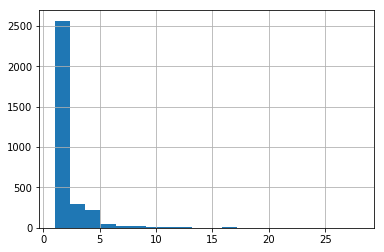

In [51]:
# Distribution of number of orders by customer_id
data.groupby('customer_id').count()['delivery_id'].hist(bins=20)

In [52]:
customers=data.groupby('customer_id').count()['delivery_id']
print("Total unique customers: "+str(customers.count()))
print("Customers making 1 order: "+str(customers[customers==1].count()))
print("Customers making 5 or more orders: "+str(customers[customers>=5].count()))

Total unique customers: 3192
Customers making 1 order: 1939
Customers making 5 or more orders: 196


A sizeable majority of customers are making only one order. Turning these existing customers into repeat customers represents a great growth opportunity.

<a id='jumpers'></a>
### Jumpers and Vehicle Types

Order count by vehicle type: 
vehicle_type
bicycle       4274
car           1215
walker         274
van             76
scooter         75
truck           48
motorcycle      21
Name: delivery_id, dtype: int64


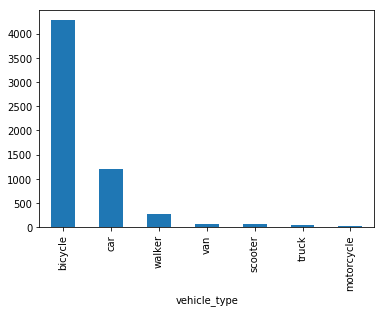

In [53]:
print('Order count by vehicle type: ')
print(data.groupby('vehicle_type').count()['delivery_id'].sort_values(ascending=False))
data.groupby('vehicle_type').count()['delivery_id'].sort_values(ascending=False).plot(kind='bar')

Number of jumpers using vehicle types: 
vehicle_type
bicycle       418
car           119
walker         18
van             8
scooter         6
truck           5
motorcycle      4
Name: jumpman_id, dtype: int64


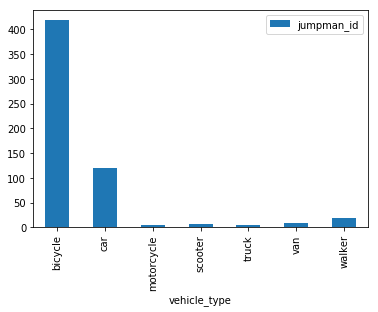

In [54]:
print('Number of jumpers using vehicle types: ')
d_tmp=data.loc[:,['jumpman_id', 'vehicle_type']].drop_duplicates()
print(d_tmp.groupby('vehicle_type').count()['jumpman_id'].sort_values(ascending=False))
d_tmp.groupby('vehicle_type').count().plot(kind='bar')

This suggests that most of our jumpers use bikes, while a sizeable minority use cars. Other forms of transport don't represent a sizable amount of orders(~10 orders per jumper). 

There doesn't appear to be a notable difference in the number of orders carried out between the different forms of transport. If we wanted to run a proper statistical test, a test of proportions(chi-squared, df=6) would be appropriate.

Total Number of Jumpers: 578
Number of Jumpers with >5 deliveries: 304
Number of Jumpers with >10 deliveries: 195
Number of Jumpers with >30 deliveries: 37
Number of Jumpers with >50 deliveries: 11


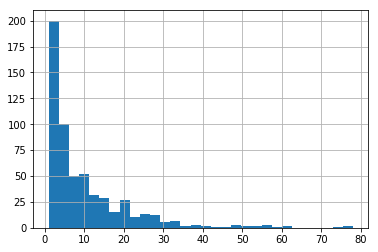

In [55]:
jumps=data.groupby('jumpman_id').count()['delivery_id']
jumps.hist(bins=30)
print('Total Number of Jumpers:', len(jumps))
print('Number of Jumpers with >5 deliveries:', len(jumps[jumps>5]))
print('Number of Jumpers with >10 deliveries:', len(jumps[jumps>10]))
print('Number of Jumpers with >30 deliveries:', len(jumps[jumps>30]))
print('Number of Jumpers with >50 deliveries:', len(jumps[jumps>50]))

<a id='partners'></a>
### Partners

Total Partners: 898
Partners handling 100 or more pickups:  8
Partners handling 50 or more pickups:  25
Partners handling 5 or fewer orders:  721
Partners handling 1 order:  457


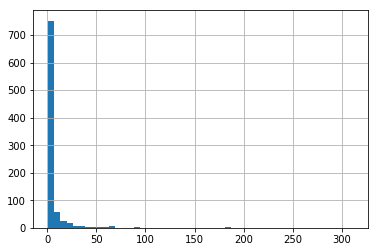

In [56]:
partners=data.groupby('pickup_place').count()['delivery_id']
partners.hist(bins=50)
print("Total Partners:", len(partners))
print("Partners handling 100 or more pickups: " ,len(partners[partners>=100]))
print("Partners handling 50 or more pickups: " ,len(partners[partners>=50]))
print("Partners handling 5 or fewer orders: ", partners[partners<=5].count())
print("Partners handling 1 order: ", partners[partners==1].count())


In [57]:
print("\nLargest partners\n")
print(partners[partners>50].sort_values(ascending=False))


Largest partners

pickup_place
Shake Shack                              311
Momofuku Milk Bar                        186
The Meatball Shop                        184
Blue Ribbon Sushi                        151
sweetgreen                               149
Blue Ribbon Fried Chicken                133
Whole Foods Market                       119
Parm                                     102
RedFarm Broadway                          93
Mighty Quinn's BBQ                        90
Chipotle Mexican Grill $1.99 Delivery     80
Momofuku Noodle Bar                       74
Hu Kitchen                                68
Trader Joe's                              68
TAO                                       67
Han Dynasty                               66
Duane Reade                               64
Sushi of Gari 46                          64
McDonald's                                62
Doughnut Plant Chelsea                    60
RedFarm Hudson                            60
La Esquina Taqueria    

In [58]:
print("\nExamples of minor partners: \n\n" + str(partners[partners<=5].sample(10)))


Examples of minor partners: 

pickup_place
Via Quadronno                5
The Little Beet              1
John's of Bleecker Street    1
A Salt & Battery             1
GO Burger                    1
Think Coffee                 1
Main Drag Music              1
Venture                      1
Fay Da Bakery                1
V-Nam Cafe                   4
Name: delivery_id, dtype: int64


<a id='spatial'></a>
### Spatial Patterns
Some controls are provided to allow temporals subsets of the data to be considered. A heatmap was considered, but it was decided that this visualization conveyed the data more clearly.

In [80]:
def f(Hour=14, Alpha=0.4):
    request = cimgt.OSM()
    fig, ax = plt.subplots(figsize=(10,16),
                           subplot_kw=dict(projection=request.crs))
    extent = [-74.05, -73.9, 40.62, 40.85]  # (xmin, xmax, ymin, ymax)
    ax.set_extent(extent)
    ax.add_image(request, 13)
    
    d_tmp=data[data['when_the_delivery_started'].dt.hour==Hour]
    x_pu, y_pu, x_do, y_do = d_tmp['pickup_lon'].to_numpy(), d_tmp['pickup_lat'].to_numpy(), d_tmp['dropoff_lon'].to_numpy(), d_tmp['dropoff_lat'].to_numpy()

    ax.plot(x_pu, y_pu, markersize=3,marker='o',linestyle='',color='green', alpha=Alpha, transform=ccrs.PlateCarree())
    ax.plot(x_do, y_do, markersize=3,marker='o',linestyle='',color='red', alpha=Alpha, transform=ccrs.PlateCarree())
    ax.plot([x_pu, x_do], [y_pu, y_do], color='black', alpha =Alpha*0.5, transform=ccrs.PlateCarree())

    plt.legend(['Pickups', 'Dropoffs'], loc='upper left')
    plt.show()
    
ipywidgets.interact(f, Hour=(0,23,1), Alpha=(0,1,.1))

interactive(children=(IntSlider(value=14, description='Hour', max=23), FloatSlider(value=0.4, description='Alp…

<function __main__.f(Hour=14, Alpha=0.4)>

In [78]:
def f(Day=1, Alpha=0.4):
    request = cimgt.OSM()
    fig, ax = plt.subplots(figsize=(10,16),
                           subplot_kw=dict(projection=request.crs))
    extent = [-74.05, -73.9, 40.62, 40.85]  # (xmin, xmax, ymin, ymax)
    ax.set_extent(extent)
    ax.add_image(request, 13)
    
    d_tmp=data[data['when_the_delivery_started'].dt.day==Day]
    x_pu, y_pu, x_do, y_do = d_tmp['pickup_lon'].to_numpy(), d_tmp['pickup_lat'].to_numpy(), d_tmp['dropoff_lon'].to_numpy(), d_tmp['dropoff_lat'].to_numpy()

    ax.plot(x_pu, y_pu, markersize=3,marker='o',linestyle='',color='green', alpha=Alpha, transform=ccrs.PlateCarree())
    ax.plot(x_do, y_do, markersize=3,marker='o',linestyle='',color='red', alpha=Alpha, transform=ccrs.PlateCarree())
    ax.plot([x_pu, x_do], [y_pu, y_do], color='black', alpha =Alpha*0.5, transform=ccrs.PlateCarree())
    
    plt.legend(['Pickups', 'Dropoffs'], loc='upper left')
    
    plt.show()
    
ipywidgets.interact(f, Day=(1,31,1), Alpha=(0,1,.1))


interactive(children=(IntSlider(value=1, description='Day', max=31, min=1), FloatSlider(value=0.4, description…

<function __main__.f(Day=1, Alpha=0.4)>

The above maps reveal what is probably the biggest growth oppotunity for Jumpman23. There is currently a significant amount of business in Manhattan, however there is very little usage in the other buroughs. 

<a id='temporal'></a>
### Temporal Patterns

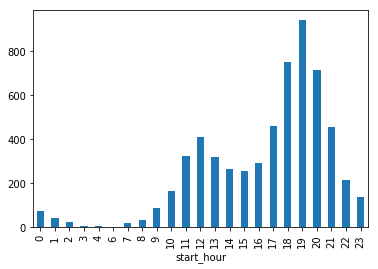

In [61]:
data['start_hour']=data['when_the_delivery_started'].dt.hour
data.groupby('start_hour').count()['delivery_id'].plot(kind='bar')


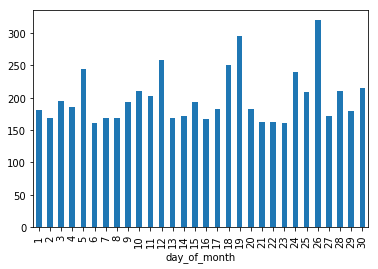

In [62]:
data['day_of_month']=data['when_the_delivery_started'].dt.day
data.groupby('day_of_month').count()['delivery_id'].plot(kind='bar')

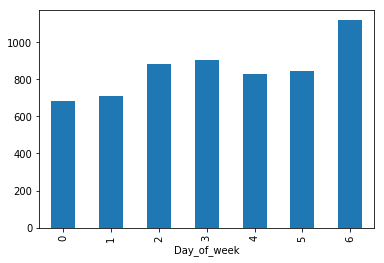

In [63]:
data['Day_of_week']=data['when_the_delivery_started'].dt.dayofweek
data.groupby('Day_of_week').count()['delivery_id'].plot(kind='bar')
#0 is monday, 6 is Sunday

The temporal patterns are largely predictable, but there are a couple of interesting features. 

Looking at the time of day, there are clear lunch and dinner rushes. I could be possible to pursue some growth in lunch and, perhaps, breakfast.

Considering the whole month, there is an obvious weekly cycle, with spike on Sundays. If you squint, there is possibly a overall upward trend(To test this I'd use a regression ANOVA with an alpha of 0.025(instead of 0.05) to penalize for the post-hoc hypothesizing). 

Looking at the trends by day of week, what surprises me most is that there isn't a Saturday spike along with the Sunday spike. Since Sunday demonstates there may be a positive weekend effect, I think offering deals or nudges on Saturday could allow for some growth there.

<a id='order_time'></a>
##### Order Time

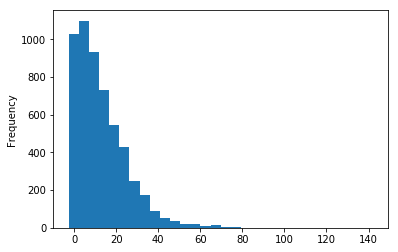

In [64]:
#The time between when an order is received and a jumper arrives. When the jumper arrives before the food is ready, this value
#can be negative
tmp=data['food_waiting_time'].dt.total_seconds()/60
tmp.plot.hist(bins=30)

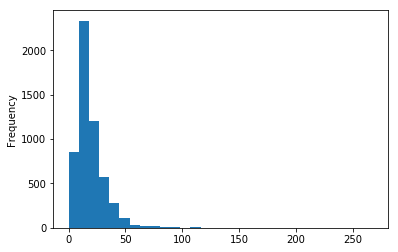

In [65]:
#The distribution of the amount of time that the jumper waits before leaving.
tmp=data['jumper_waiting_time'].dt.total_seconds()/60
tmp.plot.hist(bins=30)

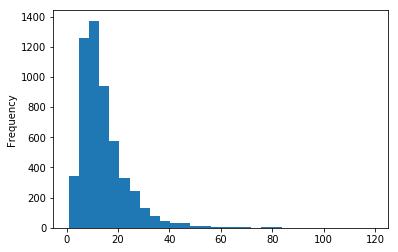

In [66]:
#The distribution of the amount of time that orders are in transit from partners to customers.
tmp=data['transit_time'].dt.total_seconds()/60
tmp.plot.hist(bins=30)

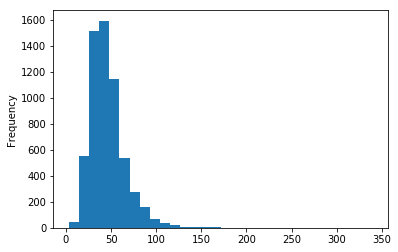

In [67]:
#The distribution of the totoal amount of time that orders take
tmp=data['total_deliver_time'].dt.total_seconds()/60
tmp.plot.hist(bins=30)

<a id='integrity'></a>
### Data Integrity

##### Observations
- We appear to have some duplicates, since I assume delivery_id is supposed to be a order-unique id.


In [68]:
#Here we are looking for duplicated values.

data.sort_values('delivery_id').head(100)

#delivery_id 1272701, 1274328 are dupicates, but appear to represent two items 
#ordered from the same location by one customer.

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,food_waiting_time,jumper_waiting_time,transit_time,total_deliver_time,start_hour,day_of_month,Day_of_week
2087,1271706,66556,154943,car,CVS Pharmacy,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,2014-10-01 00:30:21.109149,NaT,NaT,NaT,00:22:22.476667,0,1,2
4946,1271751,104131,124897,bicycle,Duane Reade,Drug Store,NaN,NaN,NaN,NaN,...,2014-10-01 00:39:31.086322,2014-10-01 00:59:57.522402,2014-10-01 01:04:14.355157,00:12:59.161548,00:20:26.436080,00:04:16.832755,00:37:42.430383,0,1,2
5719,1271867,121706,124897,bicycle,McDonald's,Fast Food,World Famous Fries,2.0,Snacks & Sides,NaN,...,2014-10-01 01:19:29.205722,2014-10-01 01:36:49.131316,2014-10-01 01:49:29.034932,00:19:22.449372,00:17:19.925594,00:12:39.903616,00:49:22.278582,1,1,2
2296,1272279,304449,112830,bicycle,Friend of a Farmer,American,Bacon,1.0,Sides,00:09:08.75807,...,2014-10-01 09:02:40.003541,2014-10-01 09:15:59.607582,2014-10-01 09:28:40.095456,00:16:24.068480,00:13:19.604041,00:12:40.487874,00:42:24.160395,8,1,2
4009,1272303,107621,127812,bicycle,Duane Reade duplicate,Convenience Store,NaN,NaN,NaN,NaN,...,2014-10-01 09:26:01.194532,2014-10-01 09:37:56.158669,2014-10-01 09:39:41.631246,00:05:39.620731,00:11:54.964137,00:01:45.472577,00:19:20.057445,9,1,2
4510,1272363,315298,67430,bicycle,16 East 11th street,NaN,NaN,NaN,NaN,NaN,...,2014-10-01 10:35:28.711387,2014-10-01 10:44:18.854276,2014-10-01 11:08:34.762117,00:32:36.532823,00:08:50.142889,00:24:15.907841,01:05:42.583553,10,1,2
2762,1272372,55334,99219,bicycle,Dudley's,American,NaN,NaN,NaN,00:12:01.737511,...,2014-10-01 10:10:27.589662,2014-10-01 10:32:19.033949,2014-10-01 10:38:35.745354,00:03:19.701189,00:21:51.444287,00:06:16.711405,00:31:27.856881,10,1,2
5442,1272382,118665,43955,bicycle,Trader Joe's,Grocery Store,Just Mango Slices,16.0,Fruits & Vegetables,NaN,...,2014-10-01 10:29:04.799830,2014-10-01 10:46:55.053860,2014-10-01 10:59:30.149614,00:14:53.128110,00:17:50.254030,00:12:35.095754,00:45:18.477894,10,1,2
5473,1272439,354016,99219,bicycle,Waverly Diner,American,Cappuccino,1.0,Gourmet Coffee,00:04:08.730077,...,2014-10-01 11:08:57.885556,2014-10-01 11:15:17.553251,2014-10-01 11:24:58.870870,00:14:29.870298,00:06:19.667695,00:09:41.317619,00:30:30.855612,10,1,2
3251,1272451,103329,30743,bicycle,Liquiteria,Juice Bar,NaN,NaN,NaN,NaN,...,2014-10-01 11:04:33.845478,2014-10-01 11:11:23.951524,2014-10-01 11:20:25.311660,00:05:22.663605,00:06:50.106046,00:09:01.360136,00:21:14.129787,10,1,2


In [69]:
print("Number of total entries: 5983")

print("Number of unique jumpers:", len(data.jumpman_id.unique()))
print(data.vehicle_type.unique())
print("Number of unique customers:", len(data.customer_id.unique()))
print("Number of unique orders:", len(data.delivery_id.unique()))

Number of total entries: 5983
Number of unique jumpers: 578
['van' 'bicycle' 'car' 'walker' 'truck' 'scooter' 'motorcycle']
Number of unique customers: 3192
Number of unique orders: 5214


In [70]:
#Looking at missing data. 
# !!!! This appears to be an issue. !!!!

print('missing jumpman arrival times:', len(data[data['when_the_Jumpman_arrived_at_pickup'].isna()]))
print('missing jumpman departed times:', len(data[data['when_the_Jumpman_left_pickup'].isna()]))


missing jumpman arrival times: 550
missing jumpman departed times: 550


In [71]:
data[data['when_the_Jumpman_arrived_at_pickup'].isna()][:5]
#I see no clear reason for these missing fields.

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,food_waiting_time,jumper_waiting_time,transit_time,total_deliver_time,start_hour,day_of_month,Day_of_week
0,1457973,327168,162381,van,Melt Shop,American,Lemonade,1.0,Beverages,00:19:58.582052,...,NaT,NaT,2014-10-26 14:52:06.313088,NaT,NaT,NaT,01:00:06.414164,13,26,6
11,1489527,49034,34669,bicycle,The Smile,American,Spaghetti & Tomato Sauce,1.0,Entrees,00:30:57.42213,...,NaT,NaT,2014-10-30 21:12:19.208892,NaT,NaT,NaT,01:05:21.970794,20,30,3
20,1413356,78465,158227,bicycle,Duane Reade,Drug Store,NaN,NaN,NaN,NaN,...,NaT,NaT,2014-10-21 10:27:55.756742,NaT,NaT,NaT,00:19:15.363799,10,21,1
23,1370431,58898,142140,car,Whole Foods Market,Grocery Store,Org Tortilla Chips Blue Corn Lightly Salted,1.0,Tortilla Chips,NaN,...,NaT,NaT,2014-10-15 23:33:42.741134,NaT,NaT,NaT,01:23:29.124623,22,15,2
36,1309391,275689,20217,car,Nobu Next Door,Sushi,Bigeye Tuna Roll,1.0,Dinner Sushi Rolls,00:07:17.915378,...,NaT,NaT,2014-10-06 20:05:04.534655,NaT,NaT,NaT,00:59:02.198975,19,6,0


##### Checking for Obvious Outliers

In [72]:
print (min(data['when_the_delivery_started']))
print (max(data['when_the_delivery_started']))
#Datetime range covers the month of october 2014, which seems reasonable.

2014-10-01 00:07:58.632482
2014-10-30 23:08:43.481900


In [73]:
print ("Pickup Min lat", min(data['pickup_lat']))
print ("Pickup Max lat", max(data['pickup_lat']))
print ("Pickup Min lon", min(data['pickup_lon']))
print ("Pickup Max lon", max(data['pickup_lon']))

print ("Dropoff Min lat", min(data['dropoff_lat']))
print ("Dropoff Max lat", max(data['dropoff_lat']))
print ("Dropoff Min lon", min(data['dropoff_lon']))
print ("Dropoff Max lon", max(data['dropoff_lon']))

#All lat/longs seem to be about NYC, so we don't have any obvious concerns here.

Pickup Min lat 40.665610864239504
Pickup Max lat 40.8180821
Pickup Min lon -74.0158367156982
Pickup Max lon -73.9209796666667
Dropoff Min lat 40.649355808310794
Dropoff Max lat 40.848324
Dropoff Min lon -74.0176786
Dropoff Max lon -73.9241235238257


In [74]:
#This is an adhoc check on delivery quality.

print('Entries with total delivery time > 60:00 : ', len(data[data['total_deliver_time']>pd.Timedelta('60 minutes')]))
print('Entries with total delivery time > 90:00 : ', len(data[data['total_deliver_time']>pd.Timedelta('90 minutes')]))
print('Entries with total delivery time > 120:00 : ', len(data[data['total_deliver_time']>pd.Timedelta('120 minutes')]))
print('Greatest delivery time:', max(data['total_deliver_time']))

Entries with total delivery time > 60:00 :  1084
Entries with total delivery time > 90:00 :  186
Entries with total delivery time > 120:00 :  44
Greatest delivery time: 0 days 05:40:18.528600


In [75]:
print('Entries with food wait time < 0:00 : ' +str(len(data[data['food_waiting_time']<pd.Timedelta('0 minutes')])))
print('Entries with jumper wait time < 0:00 : ' +str(len(data[data['jumper_waiting_time']<pd.Timedelta('0 minutes')])))
print('Entries with transit time < 0:00 : ' +str(len(data[data['transit_time']<pd.Timedelta('0 minutes')])))
print('Entries with total delivery time < 0:00 : ' +str(len(data[data['total_deliver_time']<pd.Timedelta('0 minutes')])))


Entries with food wait time < 0:00 : 501
Entries with jumper wait time < 0:00 : 0
Entries with transit time < 0:00 : 0
Entries with total delivery time < 0:00 : 0


[Return to the summary!](#summary)